## Step 1: Acquire Data
### Explore Problem
- 3 trends that might be useful to be known
- In this project i want to show some descriptive analytics and diagnostic analytics

#### Descriptive Analytics
1. Trend ordered liquors every ~day~/~month~/year (for the past 10 years)
2. Trend ordered liquors for every city
3. How many liquors ordered (in bottles/liters) for each city?
4. What liquor brand are most sold?
5. What store most order (10 highest) liquor for each city?
6. What kind of liquor (rum/vodka/beer,etc.) are most ordered?
7. What city are having most spent on liquor? (related with No. 5)

#### Diagnostic Analytics
1. is higher price liquor caused low sales? then is it affecting on what liquor sold most? (related with No. 4 Descriptive Analytics)
2. Why (on specific date) liquor sales lower/higher? (related with No. 1, 2, and 3 Descriptive Analytics)
3. Why some area have low/high liquor sales?


### Identify Data
- The data that will be used is from ['bigquery-public-data.iowa_liquor_sales.sales'](https://console.cloud.google.com/bigquery?project=revoumccasestudy&supportedpurview=project&ws=!1m5!1m4!4m3!1sbigquery-public-data!2siowa_liquor_sales!3ssales)
- For this sample project, i will limit the number of rows with 100 rows (due to specification of the laptop i'm using and faster processing)

### Import Library and Dataset

In [1]:
import pandas as pd
import pandas_gbq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read Dataset with Pandas Google Big Query (limit rows = 2500000)

In [2]:
data = pandas_gbq.read_gbq('bigquery-public-data.iowa_liquor_sales.sales', project_id='RevouMCCaseStudy', max_results=2500000)

Downloading:  10%|█         | 2500000/24229431 [25:51<3:44:43, 1611.51rows/s]


In [3]:
data.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-22091000025,2019-09-24,5003,Famous Liquors,2604 W Locust St,Davenport,52804.0,POINT (-90.615542 41.538186),82,SCOTT,...,45248,Paramount Gold Rum,6,1750,7.84,11.76,72,846.72,126.00,33.28
1,INV-14207000035,2018-08-31,3907,Smokin' Joe's #16 Tobacco and Liquor Outlet,1504 Park Ave,Muscatine,52761,POINT (-91.030569 41.442458),70,MUSCATINE,...,67524,Kahlua Coffee Liqueur,24,375,6.49,9.74,1,9.74,0.37,0.09
2,INV-35494000053,2021-04-01,3385,Sam's Club 8162 / Cedar Rapids,2605 Blairs Ferry Rd NE,Cedar Rapids,52402.0,POINT (-91.67969 42.031819),57,LINN,...,5486,Macallan 12YR,12,750,40.01,60.02,7,420.14,5.25,1.38
3,S19192700001,2014-05-29,2248,Ingersoll Liquor and Beverage,3500 INGERSOLL AVE,DES MOINES,50312,POINT (-93.664182 41.586319),77,Polk,...,902088,Ardbeg Auriverdes HA,6,750,49.99,74.99,30,2249.70,22.50,5.94
4,S22219300036,2014-11-05,4251,Aj's Liquor / Ames,4518 MORTENSON RD STE 109,AMES,50014,None,85,Story,...,82847,Dekuyper Peachtree,12,1000,7.62,11.43,4,45.72,4.00,1.06


#### Showing initial data shape

In [4]:
data.shape

(2500000, 24)

#### Change dataset index with <i>date types</i>

In [5]:
data = data.set_index('date')

In [6]:
# Make sure the types is datetime
data.index = pd.to_datetime(data.index, errors='coerce')

In [7]:
data.head()

,invoice_and_item_number,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
date,,,,,,,,,,,,,,,,,,,,,
2019-09-24,INV-22091000025,5003,Famous Liquors,2604 W Locust St,Davenport,52804.0,POINT (-90.615542 41.538186),82,SCOTT,1062100.0,...,45248,Paramount Gold Rum,6,1750,7.84,11.76,72,846.72,126.00,33.28
2018-08-31,INV-14207000035,3907,Smokin' Joe's #16 Tobacco and Liquor Outlet,1504 Park Ave,Muscatine,52761,POINT (-91.030569 41.442458),70,MUSCATINE,1081100.0,...,67524,Kahlua Coffee Liqueur,24,375,6.49,9.74,1,9.74,0.37,0.09
2021-04-01,INV-35494000053,3385,Sam's Club 8162 / Cedar Rapids,2605 Blairs Ferry Rd NE,Cedar Rapids,52402.0,POINT (-91.67969 42.031819),57,LINN,1012300,...,5486,Macallan 12YR,12,750,40.01,60.02,7,420.14,5.25,1.38
2014-05-29,S19192700001,2248,Ingersoll Liquor and Beverage,3500 INGERSOLL AVE,DES MOINES,50312,POINT (-93.664182 41.586319),77,Polk,1022200.0,...,902088,Ardbeg Auriverdes HA,6,750,49.99,74.99,30,2249.70,22.50,5.94
2014-11-05,S22219300036,4251,Aj's Liquor / Ames,4518 MORTENSON RD STE 109,AMES,50014,None,85,Story,1081330.0,...,82847,Dekuyper Peachtree,12,1000,7.62,11.43,4,45.72,4.00,1.06


```NOTE```
- The data is now has formatted index by date

## Step 2: Prepare Data
### Explore Data
#### Drop unnecessary columns
- In this project the column that will be used are following:
1. <b>date</b>: date of order
2. <b>store_name</b>: name of store who ordered the liquor
3. <b>address</b>: address of the store who ordered the liquor
4. <b>city</b>: city where the store who ordered the liquor is located
5. <b>category_name</b>: category of the liquor ordered 
6. <b>vendor_name</b>: the vendor name of the company for the brand of liquor ordered
7. <b>item_description</b>: description of the individual liquor product ordered
8. <b>pack</b>: the number of bottles in a case for the liquor ordered
9. <b>bottle_volume_ml</b>: volume of each liquor bottle ordered in milliliters
10. <b>state_bottle_retail</b>: the amount the store paid for each bottle of liquor orderes
11. <b>bottles_sold</b>: the number of bottles of liquor ordered by the store
12. <b>sales_dollars</b>: the cost of liquor order (number of bottles multiply by the state bottle retail)
13. <b>store_location</b>: information about latitude and longitude store who ordered the liquor (can be useful for folium visualization)

In [8]:
dataframe = data.drop(columns=['invoice_and_item_number', 'store_number', 'zip_code', 'county_number', 'county', 'category','vendor_number', 'item_number', 'state_bottle_cost', 'volume_sold_liters', 'volume_sold_gallons'], axis=1)

In [9]:
dataframe.head()

,store_name,address,city,store_location,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars
date,,,,,,,,,,,,
2019-09-24,Famous Liquors,2604 W Locust St,Davenport,POINT (-90.615542 41.538186),Gold Rum,LUXCO INC,Paramount Gold Rum,6,1750,11.76,72,846.72
2018-08-31,Smokin' Joe's #16 Tobacco and Liquor Outlet,1504 Park Ave,Muscatine,POINT (-91.030569 41.442458),Coffee Liqueurs,PERNOD RICARD USA,Kahlua Coffee Liqueur,24,375,9.74,1,9.74
2021-04-01,Sam's Club 8162 / Cedar Rapids,2605 Blairs Ferry Rd NE,Cedar Rapids,POINT (-91.67969 42.031819),Single Malt Scotch,Edrington Group USA LLC,Macallan 12YR,12,750,60.02,7,420.14
2014-05-29,Ingersoll Liquor and Beverage,3500 INGERSOLL AVE,DES MOINES,POINT (-93.664182 41.586319),None,"Moet Hennessy USA, Inc.",Ardbeg Auriverdes HA,6,750,74.99,30,2249.70
2014-11-05,Aj's Liquor / Ames,4518 MORTENSON RD STE 109,AMES,None,PEACH SCHNAPPS,Jim Beam Brands,Dekuyper Peachtree,12,1000,11.43,4,45.72


#### Check if there any missing value

In [10]:
dataframe.isnull().any()

store_name             False
address                 True
city                    True
store_location          True
category_name           True
vendor_name            False
item_description       False
pack                   False
bottle_volume_ml       False
state_bottle_retail     True
bottles_sold           False
sale_dollars            True
dtype: bool

There are missing value in column ```address```, ```city```, ```store_location```, ```category_name```, ```state_bottle_retail```, and ```sale_dollars```
#### How many missing values for each column

In [11]:
dataframe.isnull().sum()

store_name                  0
address                  8497
city                     8497
store_location         245915
category_name            2984
vendor_name                 0
item_description            0
pack                        0
bottle_volume_ml            0
state_bottle_retail         1
bottles_sold                0
sale_dollars                1
dtype: int64

In [12]:
dataframe.shape

(2500000, 12)

#### Check info of dataset

In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500000 entries, 2019-09-24 to 2018-11-15
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   store_name           object 
 1   address              object 
 2   city                 object 
 3   store_location       object 
 4   category_name        object 
 5   vendor_name          object 
 6   item_description     object 
 7   pack                 Int64  
 8   bottle_volume_ml     Int64  
 9   state_bottle_retail  float64
 10  bottles_sold         Int64  
 11  sale_dollars         float64
dtypes: Int64(3), float64(2), object(7)
memory usage: 255.1+ MB


```NOTE```

In [14]:
dataframe.describe()

,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars
count,2.500000e+06,2.500000e+06,2.499999e+06,2.500000e+06,2.499999e+06
mean,1.223183e+01,9.060521e+02,1.506457e+01,1.091490e+01,1.411850e+02
std,7.771454e+00,7.127471e+02,1.446421e+01,3.161188e+01,5.107631e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.000000e+00,7.500000e+02,8.250000e+00,3.000000e+00,3.372000e+01
50%,1.200000e+01,7.500000e+02,1.230000e+01,6.000000e+00,7.434000e+01
75%,1.200000e+01,1.000000e+03,1.812000e+01,1.200000e+01,1.440000e+02
max,3.360000e+02,3.780000e+05,5.305950e+03,1.320000e+04,2.509320e+05


```NOTE```

### Visualize Ideas

#### Histogram plot to see the distribution of dataset

<AxesSubplot:>

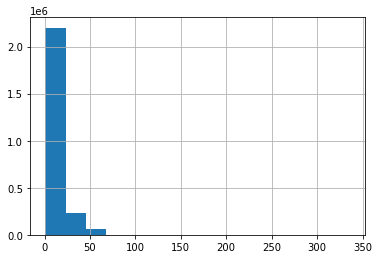

In [16]:
dataframe['pack'].hist(bins=15)

<AxesSubplot:>

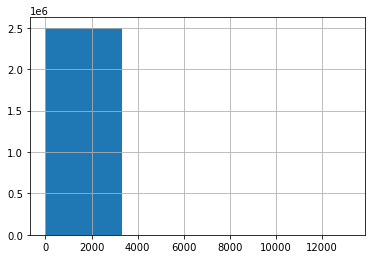

In [27]:
dataframe['bottles_sold'].hist(bins=4)

```NOTE```

#### Box plot visualization to see an outlier in dataset

<AxesSubplot:title={'center':'Liquor Ordered (pack) Data Distribution'}>

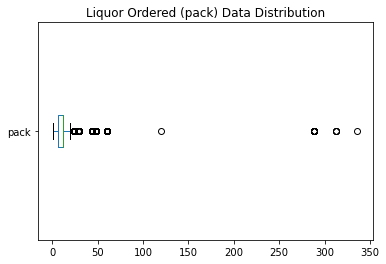

In [28]:
dataframe['pack'].plot.box(vert=False, title='Liquor Ordered (pack) Data Distribution')

```NOTE```

<AxesSubplot:title={'center':'Liquor Ordered Cost Distribution'}>

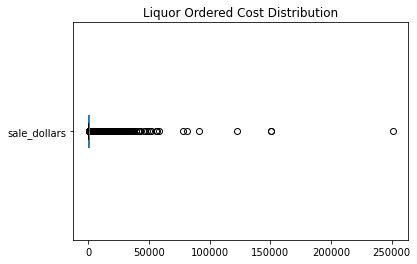

In [29]:
dataframe['sale_dollars'].plot.box(vert=False, title='Liquor Ordered Cost Distribution')

<AxesSubplot:title={'center':'Number of liquor bottles ordered sold'}>

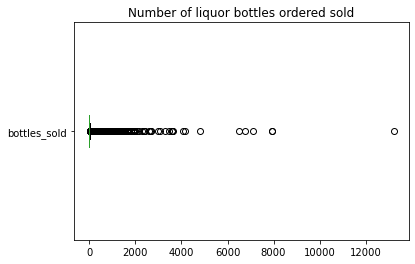

In [30]:
dataframe['bottles_sold'].plot.box(vert=False, title='Number of liquor bottles ordered sold')

```NOTE```

#### Scatter plot visualization to see relationship/correlation between two variables

<AxesSubplot:xlabel='bottles_sold', ylabel='sale_dollars'>

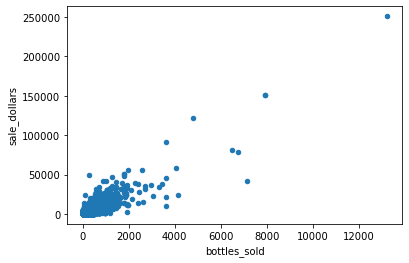

In [31]:
dataframe.plot.scatter(x='bottles_sold', y='sale_dollars')

```NOTE```

<AxesSubplot:xlabel='state_bottle_retail', ylabel='pack'>

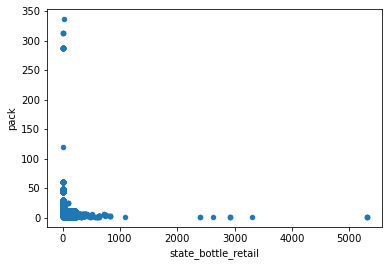

In [34]:
dataframe.plot.scatter(x='state_bottle_retail', y='pack')

<AxesSubplot:xlabel='bottle_volume_ml', ylabel='sale_dollars'>

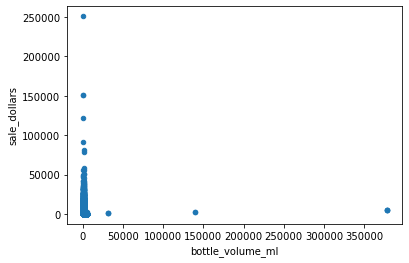

In [36]:
dataframe.plot.scatter(x='bottle_volume_ml', y='sale_dollars')

<AxesSubplot:xlabel='pack', ylabel='sale_dollars'>

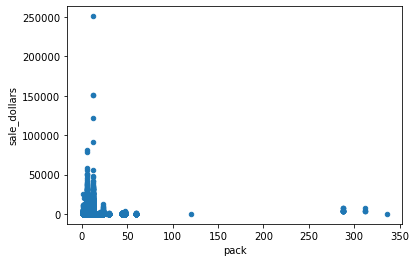

In [37]:
dataframe.plot.scatter(x='pack', y='sale_dollars')

```NOTE```

In [38]:
dataframe['city']

date
2019-09-24       Davenport
2018-08-31       Muscatine
2021-04-01    Cedar Rapids
2014-05-29      DES MOINES
2014-11-05            AMES
                  ...     
2017-04-18            None
2018-03-06         Dubuque
2022-04-13    Cedar Rapids
2018-11-07      Fort Dodge
2018-11-15    Marshalltown
Name: city, Length: 2500000, dtype: object

#### Line plot to see some trend happen in dataset

In [39]:
dataframe.index.year

Int64Index([2019, 2018, 2021, 2014, 2014, 2020, 2016, 2022, 2014, 2014,
            ...
            2022, 2021, 2021, 2018, 2019, 2017, 2018, 2022, 2018, 2018],
           dtype='int64', name='date', length=2500000)

In [40]:
dataframe = dataframe.sort_index()
dataframe.head()

,store_name,address,city,store_location,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars
date,,,,,,,,,,,,
2012-01-03,Hartig Drug Co. / JFK Rd / Dubuque,2255 JOHN F KENNEDY RD,DUBUQUE,POINT (-90.72051800000001 42.511352),BLENDED WHISKIES,Diageo Americas,Seagrams 7 Crown Bl Whiskey,24,375,5.00,24,120.00
2012-01-03,Hy-Vee Food Store / Keokuk,3111 MAIN,KEOKUK,POINT (-91.403752 40.41538),VODKA FLAVORED,Jim Beam Brands,Pucker Vodka 50ml Gravity Feed,3,2000,40.02,1,40.02
2012-01-03,Shamrock Spirits,1204 WATER ST PO BOX 177,ALDEN,POINT (-93.376271 42.520423),IMPORTED VODKA,Pernod Ricard USA/Austin Nichols,Absolut Swedish Vodka 80 Prf,12,1000,22.34,6,134.04
2012-01-03,Save A Lot #482,2122 MAIN ST,KEOKUK,POINT (-91.39688800000002 40.408821),IMPORTED VODKA,"Bacardi U.S.A., Inc.",Grey Goose Vodka,6,1000,32.66,6,195.96
2012-01-03,Hy-Vee Wine and Spirits / Hubbell,2310 HUBBELL AVE,DES MOINES,POINT (-93.573845 41.604312),IMPORTED SCHNAPPS,Diageo Americas,Rumple Minze Peppermint Schnapps Liqueur Mini,8,800,30.17,1,30.17


<AxesSubplot:xlabel='date'>

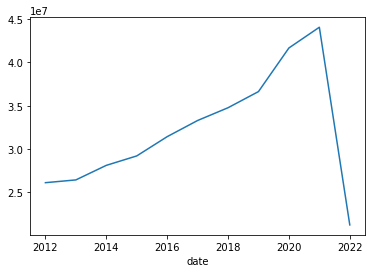

In [54]:
dataframe.groupby([dataframe.index.year])['sale_dollars'].sum().plot()

```NOTE```

<AxesSubplot:xlabel='date'>

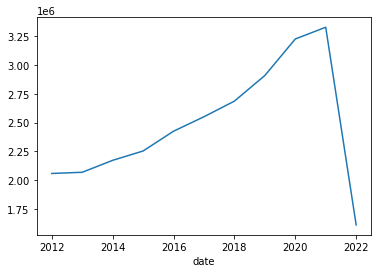

In [53]:
dataframe.groupby([dataframe.index.year])['bottles_sold'].sum().plot()

```NOTE```

<AxesSubplot:xlabel='date'>

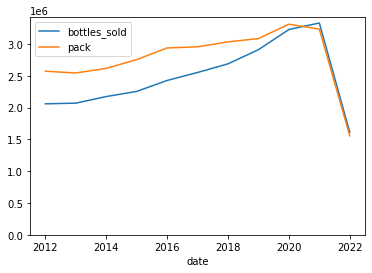

In [49]:
dataframe.groupby([dataframe.index.year])[['bottles_sold', 'pack']].sum().plot(ylim=0)

<AxesSubplot:xlabel='date'>

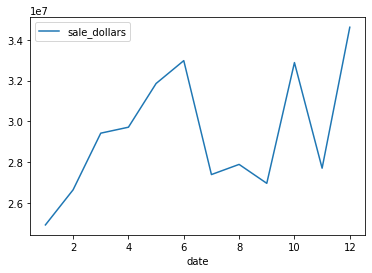

In [52]:
dataframe.groupby([dataframe.index.month])[['sale_dollars']].sum().plot()

```NOTE```

### Cleaning Dataset
- We know the data has null values in some columns
- Do cleaning data with drop the ```NaN``` values
- Assume that it's not affected the data quality if we remove rows of data that contain ```NaN``` value

In [55]:
len(dataframe), len(dataframe.dropna())

(2500000, 2251390)

In [56]:
dataframe = dataframe.dropna()
dataframe.head()

,store_name,address,city,store_location,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars
date,,,,,,,,,,,,
2012-01-03,Hartig Drug Co. / JFK Rd / Dubuque,2255 JOHN F KENNEDY RD,DUBUQUE,POINT (-90.72051800000001 42.511352),BLENDED WHISKIES,Diageo Americas,Seagrams 7 Crown Bl Whiskey,24,375,5.00,24,120.00
2012-01-03,Hy-Vee Food Store / Keokuk,3111 MAIN,KEOKUK,POINT (-91.403752 40.41538),VODKA FLAVORED,Jim Beam Brands,Pucker Vodka 50ml Gravity Feed,3,2000,40.02,1,40.02
2012-01-03,Shamrock Spirits,1204 WATER ST PO BOX 177,ALDEN,POINT (-93.376271 42.520423),IMPORTED VODKA,Pernod Ricard USA/Austin Nichols,Absolut Swedish Vodka 80 Prf,12,1000,22.34,6,134.04
2012-01-03,Save A Lot #482,2122 MAIN ST,KEOKUK,POINT (-91.39688800000002 40.408821),IMPORTED VODKA,"Bacardi U.S.A., Inc.",Grey Goose Vodka,6,1000,32.66,6,195.96
2012-01-03,Hy-Vee Wine and Spirits / Hubbell,2310 HUBBELL AVE,DES MOINES,POINT (-93.573845 41.604312),IMPORTED SCHNAPPS,Diageo Americas,Rumple Minze Peppermint Schnapps Liqueur Mini,8,800,30.17,1,30.17


In [57]:
dataframe.shape

(2251390, 12)

### Transforming Dataset
- Make sure each column has the correct type values

#### Change string values in categorical columns to <i>Proper Case</i>
- Make sure for each categorical columns has string data types
- Change string values in columns ```city```, ```category_name```, and ```item_description``` to ```title case```

In [58]:
dataframe['kota'] = dataframe['city'].astype(str)
dataframe.head()

,store_name,address,city,store_location,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,kota
date,,,,,,,,,,,,,
2012-01-03,Hartig Drug Co. / JFK Rd / Dubuque,2255 JOHN F KENNEDY RD,DUBUQUE,POINT (-90.72051800000001 42.511352),BLENDED WHISKIES,Diageo Americas,Seagrams 7 Crown Bl Whiskey,24,375,5.00,24,120.00,DUBUQUE
2012-01-03,Hy-Vee Food Store / Keokuk,3111 MAIN,KEOKUK,POINT (-91.403752 40.41538),VODKA FLAVORED,Jim Beam Brands,Pucker Vodka 50ml Gravity Feed,3,2000,40.02,1,40.02,KEOKUK
2012-01-03,Shamrock Spirits,1204 WATER ST PO BOX 177,ALDEN,POINT (-93.376271 42.520423),IMPORTED VODKA,Pernod Ricard USA/Austin Nichols,Absolut Swedish Vodka 80 Prf,12,1000,22.34,6,134.04,ALDEN
2012-01-03,Save A Lot #482,2122 MAIN ST,KEOKUK,POINT (-91.39688800000002 40.408821),IMPORTED VODKA,"Bacardi U.S.A., Inc.",Grey Goose Vodka,6,1000,32.66,6,195.96,KEOKUK
2012-01-03,Hy-Vee Wine and Spirits / Hubbell,2310 HUBBELL AVE,DES MOINES,POINT (-93.573845 41.604312),IMPORTED SCHNAPPS,Diageo Americas,Rumple Minze Peppermint Schnapps Liqueur Mini,8,800,30.17,1,30.17,DES MOINES


In [59]:
dataframe['kota'] = dataframe['kota'].str.title()

In [60]:
dataframe['kota']

date
2012-01-03          Dubuque
2012-01-03           Keokuk
2012-01-03            Alden
2012-01-03           Keokuk
2012-01-03       Des Moines
                  ...      
2022-06-30             Ames
2022-06-30             Ames
2022-06-30    Pleasant Hill
2022-06-30         Waterloo
2022-06-30         Waterloo
Name: kota, Length: 2251390, dtype: object

In [61]:
# Make sure the column types is string
dataframe['city'] = dataframe['city'].astype(str)
dataframe['category_name'] = dataframe['category_name'].astype(str)
dataframe['item_description'] = dataframe['item_description'].astype(str)

# Change string values to title case
dataframe['city'] = dataframe['city'].str.title()
dataframe['category_name'] = dataframe['category_name'].str.title()
dataframe['item_description'] = dataframe['item_description'].str.title()

In [62]:
dataframe.drop(columns=['kota'], inplace=True)
dataframe.head()

,store_name,address,city,store_location,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars
date,,,,,,,,,,,,
2012-01-03,Hartig Drug Co. / JFK Rd / Dubuque,2255 JOHN F KENNEDY RD,Dubuque,POINT (-90.72051800000001 42.511352),Blended Whiskies,Diageo Americas,Seagrams 7 Crown Bl Whiskey,24,375,5.00,24,120.00
2012-01-03,Hy-Vee Food Store / Keokuk,3111 MAIN,Keokuk,POINT (-91.403752 40.41538),Vodka Flavored,Jim Beam Brands,Pucker Vodka 50Ml Gravity Feed,3,2000,40.02,1,40.02
2012-01-03,Shamrock Spirits,1204 WATER ST PO BOX 177,Alden,POINT (-93.376271 42.520423),Imported Vodka,Pernod Ricard USA/Austin Nichols,Absolut Swedish Vodka 80 Prf,12,1000,22.34,6,134.04
2012-01-03,Save A Lot #482,2122 MAIN ST,Keokuk,POINT (-91.39688800000002 40.408821),Imported Vodka,"Bacardi U.S.A., Inc.",Grey Goose Vodka,6,1000,32.66,6,195.96
2012-01-03,Hy-Vee Wine and Spirits / Hubbell,2310 HUBBELL AVE,Des Moines,POINT (-93.573845 41.604312),Imported Schnapps,Diageo Americas,Rumple Minze Peppermint Schnapps Liqueur Mini,8,800,30.17,1,30.17


#### Split the values of <i>store location</i> columns into latitude and longitude

In [63]:
dataframe['store_location'].unique()

array(['POINT (-90.72051800000001 42.511352)',
       'POINT (-91.403752 40.41538)', 'POINT (-93.376271 42.520423)', ...,
       'POINT (-92.219401 42.466286)', 'POINT (-91.801676 40.699004)',
       'POINT (-91.100819 40.811941)'], dtype=object)

In [64]:
dataframe['store_location'].nunique()

3145

```NOTE```

#### Remove characters with slicing on <i>store location</i> column
- Remove ```POINT ``` string in ```store_location``` column, take only the map location of latitude and longitude

In [65]:
dataframe['map_location'] = dataframe['store_location'].str[7:]
dataframe.head()

,store_name,address,city,store_location,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,map_location
date,,,,,,,,,,,,,
2012-01-03,Hartig Drug Co. / JFK Rd / Dubuque,2255 JOHN F KENNEDY RD,Dubuque,POINT (-90.72051800000001 42.511352),Blended Whiskies,Diageo Americas,Seagrams 7 Crown Bl Whiskey,24,375,5.00,24,120.00,-90.72051800000001 42.511352)
2012-01-03,Hy-Vee Food Store / Keokuk,3111 MAIN,Keokuk,POINT (-91.403752 40.41538),Vodka Flavored,Jim Beam Brands,Pucker Vodka 50Ml Gravity Feed,3,2000,40.02,1,40.02,-91.403752 40.41538)
2012-01-03,Shamrock Spirits,1204 WATER ST PO BOX 177,Alden,POINT (-93.376271 42.520423),Imported Vodka,Pernod Ricard USA/Austin Nichols,Absolut Swedish Vodka 80 Prf,12,1000,22.34,6,134.04,-93.376271 42.520423)
2012-01-03,Save A Lot #482,2122 MAIN ST,Keokuk,POINT (-91.39688800000002 40.408821),Imported Vodka,"Bacardi U.S.A., Inc.",Grey Goose Vodka,6,1000,32.66,6,195.96,-91.39688800000002 40.408821)
2012-01-03,Hy-Vee Wine and Spirits / Hubbell,2310 HUBBELL AVE,Des Moines,POINT (-93.573845 41.604312),Imported Schnapps,Diageo Americas,Rumple Minze Peppermint Schnapps Liqueur Mini,8,800,30.17,1,30.17,-93.573845 41.604312)


#### Create new columns <i>latitude</i> and <i>longitude</i>

In [66]:
# Apply slicing to fetch value that only contain latitudes from map_location column
dataframe['latitude'] = dataframe['map_location'].str[:10]
dataframe['latitude'].unique()

array(['-90.720518', '-91.403752', '-93.376271', ..., '-91.948629',
       '-91.801676', '-91.100819'], dtype=object)

In [67]:
# Apply slicing to fetch value that only contain longitudes from map_location column
dataframe['longitude'] = dataframe['map_location'].str[11:-1]
dataframe['longitude'].unique()

array(['0000001 42.511352', '40.41538', '42.520423', ..., '42.466286',
       '40.699004', '40.811941'], dtype=object)

#### Drop columns <i>store_location</i> and <i>map_location</i>
- We want only fetch information of latitudes and longitudes by separated new columns

In [68]:
dataframe.drop(columns=['store_location', 'map_location'], inplace=True)
dataframe.head()

,store_name,address,city,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,latitude,longitude
date,,,,,,,,,,,,,
2012-01-03,Hartig Drug Co. / JFK Rd / Dubuque,2255 JOHN F KENNEDY RD,Dubuque,Blended Whiskies,Diageo Americas,Seagrams 7 Crown Bl Whiskey,24,375,5.00,24,120.00,-90.720518,0000001 42.511352
2012-01-03,Hy-Vee Food Store / Keokuk,3111 MAIN,Keokuk,Vodka Flavored,Jim Beam Brands,Pucker Vodka 50Ml Gravity Feed,3,2000,40.02,1,40.02,-91.403752,40.41538
2012-01-03,Shamrock Spirits,1204 WATER ST PO BOX 177,Alden,Imported Vodka,Pernod Ricard USA/Austin Nichols,Absolut Swedish Vodka 80 Prf,12,1000,22.34,6,134.04,-93.376271,42.520423
2012-01-03,Save A Lot #482,2122 MAIN ST,Keokuk,Imported Vodka,"Bacardi U.S.A., Inc.",Grey Goose Vodka,6,1000,32.66,6,195.96,-91.396888,0000002 40.408821
2012-01-03,Hy-Vee Wine and Spirits / Hubbell,2310 HUBBELL AVE,Des Moines,Imported Schnapps,Diageo Americas,Rumple Minze Peppermint Schnapps Liqueur Mini,8,800,30.17,1,30.17,-93.573845,41.604312


In [69]:
dataframe.shape

(2251390, 13)

```NOTE```

## Analyze Data

### Descriptive Analytics
- In this section we want to do some descriptive analytics such as:
1. Trend ordered liquors for each city
2. How many liquors ordered each year
3. What liquor are most sold
4. What city most ordered liquor
5. What kind of liquor most ordered (vodka/beer/coffee/etc.)

#### 1. Trend ordered liquors for each city
- We want to see what brand of liquors most ordered for each city (<i>show 10 city with largest amount of liquor ordered</i>)

In [70]:
dataframe.groupby(['city', 'item_description'])['pack'].sum().sort_values(ascending=False)

city          item_description                
Des Moines    Black Velvet                        84174
              Fireball Cinnamon Whiskey           72198
Cedar Rapids  Black Velvet                        64662
              Hawkeye Vodka                       55296
Des Moines    Hawkeye Vodka                       54420
                                                  ...  
Glenwood      Tooters Rainbow Pack                    1
Dubuque       99 Brand Cherry Limeade Pet Mini        1
Spencer       Blue Ox Vodka Mini                      1
Dubuque       99 Brand Candy Canes                    1
Sac City      99 Grapes Pet Mini                      1
Name: pack, Length: 224065, dtype: Int64

<AxesSubplot:xlabel='city,item_description'>

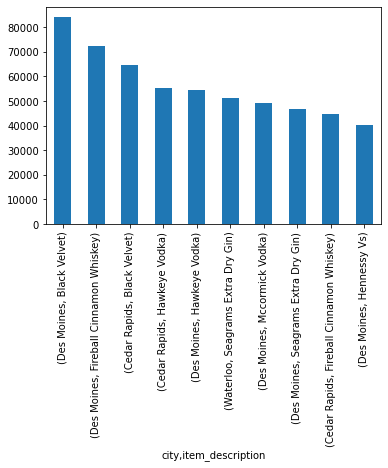

In [71]:
dataframe.groupby(['city', 'item_description'])['pack'].sum().sort_values(ascending=False).head(10).plot.bar()

```NOTE```

In [72]:
dataframe.groupby(['city', 'item_description'])['pack'].sum().sort_values(ascending=False).unstack().idxmax(axis=1)

city
Ackley                     Black Velvet
Adair                      Black Velvet
Adel                      Hawkeye Vodka
Afton                      Black Velvet
Akron                      Black Velvet
                       ...             
Winthrop                   Black Velvet
Woodbine                  Hawkeye Vodka
Woodward                   Black Velvet
Wyoming                    Black Velvet
Zwingle     Seagrams 7 Crown Bl Whiskey
Length: 462, dtype: object

In [73]:
dataframe.groupby(['city', 'item_description'])['pack'].sum().sort_values(ascending=False).unstack().max(axis=1)

city
Ackley       834.0
Adair        612.0
Adel        2436.0
Afton        450.0
Akron        696.0
             ...  
Winthrop     198.0
Woodbine     348.0
Woodward     888.0
Wyoming      132.0
Zwingle      192.0
Length: 462, dtype: float64

```NOTE```

####  2. How many liquors ordered each year
- We want to see what trend happen in the past 10 years of ordered liquor in ```Iowa```

In [74]:
dataframe.groupby([dataframe.index.year])['pack'].sum()

date
2012    2336390
2013    2318055
2014    2386630
2015    2505316
2016    2607488
2017    2607647
2018    2736671
2019    2794731
2020    3011697
2021    2851162
2022    1400436
Name: pack, dtype: Int64

<AxesSubplot:xlabel='date'>

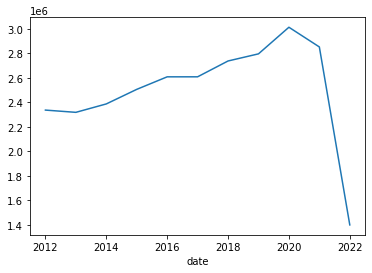

In [75]:
dataframe.groupby([dataframe.index.year])['pack'].sum().plot()

```NOTE```

<AxesSubplot:xlabel='date'>

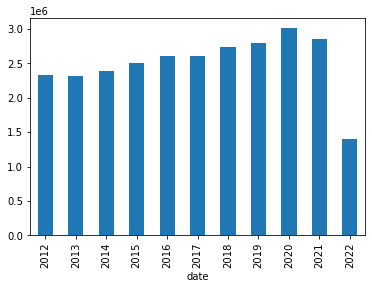

In [76]:
dataframe.groupby([dataframe.index.year])['pack'].sum().plot.bar()

```NOTE```

#### 3. What liquor (brand) are most sold (for the past 10 years)

In [77]:
# What liquor (brand) most sold (in past 10 years)
dataframe.groupby(['item_description'])['bottles_sold'].sum().sort_values(ascending=False)

item_description
Black Velvet                             1287376
Fireball Cinnamon Whiskey                1156773
Hawkeye Vodka                             881028
Titos Handmade Vodka                      662215
Five O'Clock Vodka                        534163
                                          ...   
Wicked 87 American Light Whiskey Mini          1
Giro Gold                                      1
Schwartzhog Krauter Liqueur Mini               1
Ha Green Spot Chateau Leoville Barton          1
Noah'S Mill Ha                                 1
Name: bottles_sold, Length: 7606, dtype: Int64

<AxesSubplot:xlabel='Liquor Brand'>

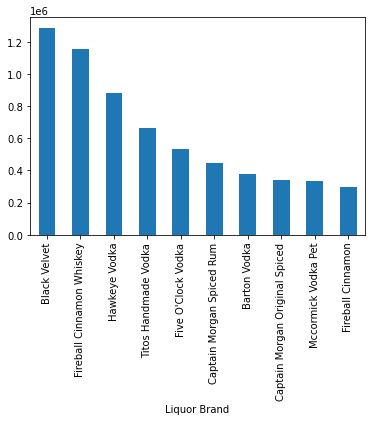

In [78]:
# 10 highest sold liquor (every store, for the past 10 years)
dataframe.groupby(['item_description'])['bottles_sold'].sum().sort_values(ascending=False).head(10).plot.bar(xlabel='Liquor Brand')

```NOTE```

#### 4. What liquor (brand) are most sold for each year

In [79]:
# Group dataset by item_description and year to see how many liquors are sold
dataframe.groupby(['item_description', dataframe.index.year])['bottles_sold'].sum().sort_values(ascending=False).head(10)

item_description           date
Fireball Cinnamon Whiskey  2020    293843
                           2021    284716
                           2022    167686
Titos Handmade Vodka       2020    153027
Black Velvet               2020    147262
Fireball Cinnamon          2019    135651
Black Velvet               2019    132134
Titos Handmade Vodka       2021    131988
Black Velvet               2015    124290
                           2018    123043
Name: bottles_sold, dtype: Int64

In [80]:
# Show into multi index dataframe
# Item description as index and date (year) as column
# Show 10 data entry with maximum sold for each liquor brand
dataframe.groupby(['item_description', dataframe.index.year])['bottles_sold'].sum().sort_values(ascending=False).head(10).unstack()

date,2020,2021,2022,2019,2015,2018
item_description,,,,,,
Fireball Cinnamon Whiskey,293843,284716,167686,<NA>,<NA>,<NA>
Titos Handmade Vodka,153027,131988,<NA>,<NA>,<NA>,<NA>
Black Velvet,147262,<NA>,<NA>,132134,124290,123043
Fireball Cinnamon,<NA>,<NA>,<NA>,135651,<NA>,<NA>


In [81]:
# Create new dataframe as df1 to simplify dataset
# Make sure the amount of bottles_sold by each liquor brand and year is sorted
df1 = dataframe.groupby(['item_description', dataframe.index.year])['bottles_sold'].sum().sort_values(ascending=False).unstack()
df1

date,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
item_description,,,,,,,,,,,
"""Jose Cuervo Silver """"Rolling Stones""""""",<NA>,<NA>,<NA>,<NA>,30,48,<NA>,<NA>,<NA>,<NA>,<NA>
"""Rumchata """"Gochatas""""""",<NA>,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
"""Rumchata """"Minichatas"""" Creamer Cups""",<NA>,<NA>,<NA>,<NA>,398,421,276,<NA>,<NA>,<NA>,<NA>
(Ri)1 Rye,44,9,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
10 Cane Rum,18,79,79,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
Zing 72 Gin W/Copper Cup,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,15,<NA>,<NA>,<NA>,<NA>
Ziyad White Rye,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,4,<NA>,<NA>,<NA>
Zu Bison Grass Vodka,<NA>,<NA>,<NA>,12,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [82]:
# Create new dataframe as df2 to simplify dataset for plotting
# Fetch value that only contain maximum value for each column and rows in dataset df1
df2 = pd.DataFrame({'liquor_brand':df1.idxmax(), 'bottles_sold': df1.max()})
df2

,liquor_brand,bottles_sold
date,,
2012,Black Velvet,101725
2013,Black Velvet,115667
2014,Black Velvet,119713
2015,Black Velvet,124290
2016,Black Velvet,121258
2017,Black Velvet,122343
2018,Black Velvet,123043
2019,Fireball Cinnamon,135651
2020,Fireball Cinnamon Whiskey,293843


```NOTE```

<AxesSubplot:xlabel='date'>

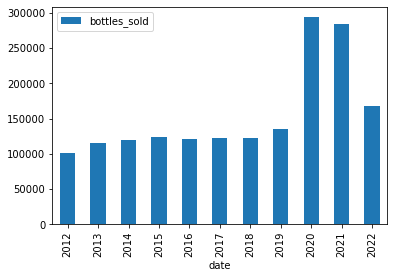

In [83]:
df2.plot.bar()

```NOTE```

In [84]:
# Groupby dataset df2 by year and item_description
df2.groupby([df2.index, 'liquor_brand'])['bottles_sold'].sum()

date  liquor_brand             
2012  Black Velvet                 101725
2013  Black Velvet                 115667
2014  Black Velvet                 119713
2015  Black Velvet                 124290
2016  Black Velvet                 121258
2017  Black Velvet                 122343
2018  Black Velvet                 123043
2019  Fireball Cinnamon            135651
2020  Fireball Cinnamon Whiskey    293843
2021  Fireball Cinnamon Whiskey    284716
2022  Fireball Cinnamon Whiskey    167686
Name: bottles_sold, dtype: int64

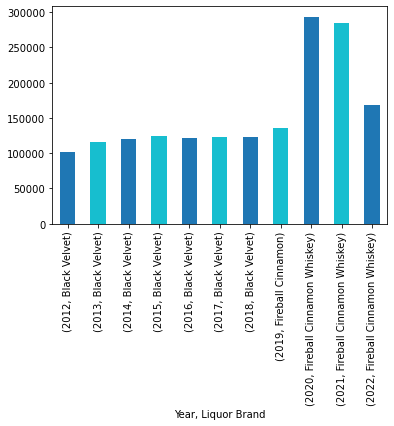

In [85]:
fig, ax = plt.subplots()
ax = df2.groupby([df2.index, 'liquor_brand'])['bottles_sold'].sum().plot(kind='bar', color=['C0','C9'], xlabel='Year, Liquor Brand')

```NOTE```

#### 5. What city most ordered liquor (for the past 10 years)

<AxesSubplot:xlabel='city'>

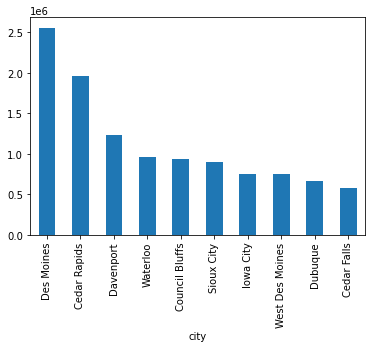

In [86]:
dataframe.groupby(['city'])['pack'].sum().sort_values(ascending=False).head(10).plot.bar()

In [87]:
# Create new dataframe as df3
df3 = dataframe.groupby(['city', dataframe.index.year])['pack'].sum().sort_values(ascending=False).unstack()
df3

date,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
city,,,,,,,,,,,
Ackley,678,708,768,962,1217,1331,1078,949,462,443,263
Adair,616,322,468,340,592,925,597,688,1443,1184,<NA>
Adel,3376,2968,3134,2670,3781,3559,3223,4224,4495,6361,3466
Afton,318,336,172,222,241,230,257,493,615,603,229
Akron,515,756,762,686,752,798,748,858,594,757,272
...,...,...,...,...,...,...,...,...,...,...,...
Winthrop,642,624,378,312,342,288,282,234,378,330,60
Woodbine,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1934,2058,2749,2704,1368
Woodward,510,540,474,438,600,697,592,579,628,410,110


In [88]:
# Create new dataframe as df4 for simplifying df3
df4 = pd.DataFrame({'city':df3.idxmax(), 'pack': df3.max()})
df4

,city,pack
date,,
2012,Des Moines,219258
2013,Des Moines,216481
2014,Des Moines,234721
2015,Des Moines,237175
2016,Des Moines,255438
2017,Des Moines,250358
2018,Des Moines,255103
2019,Des Moines,253751
2020,Des Moines,262657


In [89]:
# Groupby dataset df4 by year and city
df4.groupby([df4.index, 'city'])['pack'].sum()

date  city      
2012  Des Moines    219258
2013  Des Moines    216481
2014  Des Moines    234721
2015  Des Moines    237175
2016  Des Moines    255438
2017  Des Moines    250358
2018  Des Moines    255103
2019  Des Moines    253751
2020  Des Moines    262657
2021  Des Moines    249912
2022  Des Moines    123423
Name: pack, dtype: int64

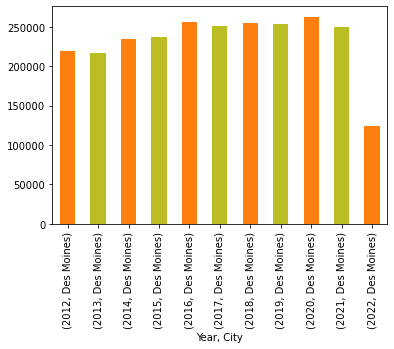

In [90]:
fig, ax = plt.subplots()
ax = df4.groupby([df4.index, 'city'])['pack'].sum().plot(kind='bar', color=['C1','C8'], xlabel='Year, City')

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, '(2021, Des Moines)'),
  Text(0.0, 0, '(2012, Des Moines)'),
  Text(2.0, 0, '(2014, Des Moines)'),
  Text(4.0, 0, '(2016, Des Moines)'),
  Text(6.0, 0, '(2018, Des Moines)'),
  Text(8.0, 0, '(2020, Des Moines)'),
  Text(10.0, 0, '(2022, Des Moines)'),
  Text(12.0, 0, '')])

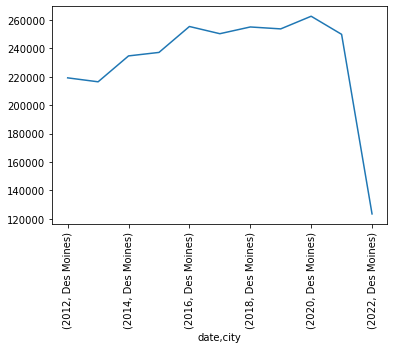

In [93]:
fig, ax = plt.subplots()
ax = df4.groupby([df4.index, 'city'])['pack'].sum().plot()
plt.xticks(rotation=90)

#### 6. What kind of liquor most ordered each year

<AxesSubplot:xlabel='category_name'>

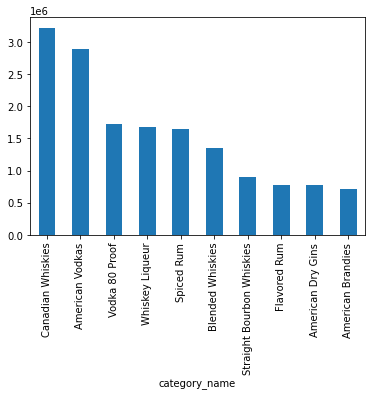

In [94]:
dataframe.groupby(['category_name'])['pack'].sum().sort_values(ascending=False).head(10).plot.bar()

In [95]:
# Create new dataframe as df5
df5 = dataframe.groupby(['category_name', dataframe.index.year])['pack'].sum().sort_values(ascending=False).unstack()

# Create new dataframe as df6 for simplifying df5
df6 = pd.DataFrame({'liquor_category':df5.idxmax(), 'pack': df5.max()})
df6

,liquor_category,pack
date,,
2012,Vodka 80 Proof,341433
2013,Vodka 80 Proof,337705
2014,Vodka 80 Proof,364384
2015,Vodka 80 Proof,393034
2016,Canadian Whiskies,315891
2017,American Vodkas,453439
2018,American Vodkas,484716
2019,American Vodkas,498562
2020,American Vodkas,518495


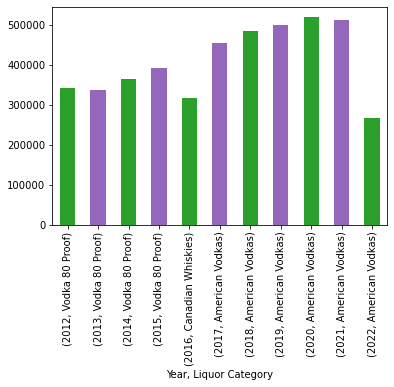

In [96]:
# Groupby dataset df6 by year and liquor_category
df6.groupby([df6.index, 'liquor_category'])['pack'].sum()

fig, ax = plt.subplots()
ax = df6.groupby([df6.index, 'liquor_category'])['pack'].sum().plot(kind='bar', color=['C2','C4'], xlabel='Year, Liquor Category')

```NOTE```

#### 7. What city are having most spend on liquor

In [97]:
dataframe.head()

,store_name,address,city,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,latitude,longitude
date,,,,,,,,,,,,,
2012-01-03,Hartig Drug Co. / JFK Rd / Dubuque,2255 JOHN F KENNEDY RD,Dubuque,Blended Whiskies,Diageo Americas,Seagrams 7 Crown Bl Whiskey,24,375,5.00,24,120.00,-90.720518,0000001 42.511352
2012-01-03,Hy-Vee Food Store / Keokuk,3111 MAIN,Keokuk,Vodka Flavored,Jim Beam Brands,Pucker Vodka 50Ml Gravity Feed,3,2000,40.02,1,40.02,-91.403752,40.41538
2012-01-03,Shamrock Spirits,1204 WATER ST PO BOX 177,Alden,Imported Vodka,Pernod Ricard USA/Austin Nichols,Absolut Swedish Vodka 80 Prf,12,1000,22.34,6,134.04,-93.376271,42.520423
2012-01-03,Save A Lot #482,2122 MAIN ST,Keokuk,Imported Vodka,"Bacardi U.S.A., Inc.",Grey Goose Vodka,6,1000,32.66,6,195.96,-91.396888,0000002 40.408821
2012-01-03,Hy-Vee Wine and Spirits / Hubbell,2310 HUBBELL AVE,Des Moines,Imported Schnapps,Diageo Americas,Rumple Minze Peppermint Schnapps Liqueur Mini,8,800,30.17,1,30.17,-93.573845,41.604312


In [98]:
dataframe['order_cost'] = dataframe['pack'] * dataframe['state_bottle_retail']
dataframe.head()

,store_name,address,city,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,latitude,longitude,order_cost
date,,,,,,,,,,,,,,
2012-01-03,Hartig Drug Co. / JFK Rd / Dubuque,2255 JOHN F KENNEDY RD,Dubuque,Blended Whiskies,Diageo Americas,Seagrams 7 Crown Bl Whiskey,24,375,5.00,24,120.00,-90.720518,0000001 42.511352,120.0
2012-01-03,Hy-Vee Food Store / Keokuk,3111 MAIN,Keokuk,Vodka Flavored,Jim Beam Brands,Pucker Vodka 50Ml Gravity Feed,3,2000,40.02,1,40.02,-91.403752,40.41538,120.06
2012-01-03,Shamrock Spirits,1204 WATER ST PO BOX 177,Alden,Imported Vodka,Pernod Ricard USA/Austin Nichols,Absolut Swedish Vodka 80 Prf,12,1000,22.34,6,134.04,-93.376271,42.520423,268.08
2012-01-03,Save A Lot #482,2122 MAIN ST,Keokuk,Imported Vodka,"Bacardi U.S.A., Inc.",Grey Goose Vodka,6,1000,32.66,6,195.96,-91.396888,0000002 40.408821,195.96
2012-01-03,Hy-Vee Wine and Spirits / Hubbell,2310 HUBBELL AVE,Des Moines,Imported Schnapps,Diageo Americas,Rumple Minze Peppermint Schnapps Liqueur Mini,8,800,30.17,1,30.17,-93.573845,41.604312,241.36


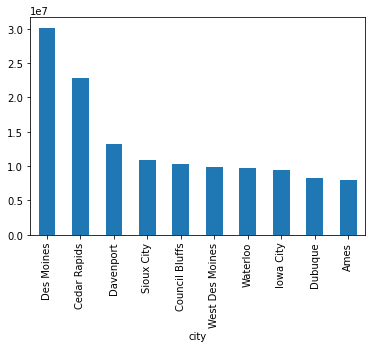

In [102]:
df7 = dataframe.groupby(['city'])['order_cost'].sum().sort_values(ascending=False).head(10).plot.bar()

In [99]:
# Create new dataframe as df7
df7 = dataframe.groupby(['city', dataframe.index.year])['order_cost'].sum().sort_values(ascending=False).unstack()

# Create new dataframe as df8 for simplifying df7
df8 = pd.DataFrame({'City':df7.idxmax(), 'Order_cost': df7.max()})
df8

,City,Order_cost
date,,
2012,Des Moines,2476234.88
2013,Des Moines,2528625.69
2014,Des Moines,2756254.88
2015,Des Moines,2769729.82
2016,Des Moines,2960624.91
2017,Des Moines,2990640.66
2018,Des Moines,3001465.76
2019,Des Moines,2994153.22
2020,Des Moines,3112450.49


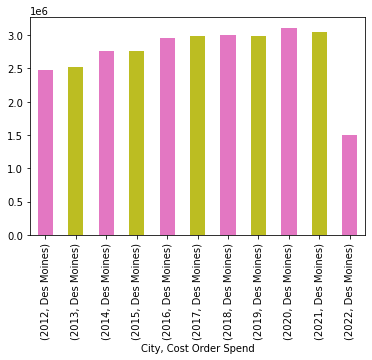

In [100]:
# Groupby dataset df8 by city and cost order
df8.groupby([df8.index, 'City'])['Order_cost'].sum()

fig, ax = plt.subplots()
ax = df8.groupby([df8.index, 'City'])['Order_cost'].sum().plot(kind='bar', color=['C6','C8'], xlabel='City, Cost Order Spend')

```NOTE```

### Diagnostic Analytics
1. The higher place liquor less sold? if yes, then it is affect on what liquor sold most?
2. Why on specific date liquor sales lower/higher
3. Why this area have low liquor sales?

```CODE```